In [ ]:
pip install tensorflow


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (x_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam', #how to learn
    loss = 'binary_crossentropy', #how to minimize loss
    metrics = ['accuracy'] #what to track
)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [early_stop]
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.7033 - loss: 0.5923 - val_accuracy: 0.9780 - val_loss: 0.4335
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8482 - loss: 0.4709 - val_accuracy: 0.9780 - val_loss: 0.3322
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8956 - loss: 0.3693 - val_accuracy: 0.9670 - val_loss: 0.2583
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9459 - loss: 0.2777 - val_accuracy: 0.9670 - val_loss: 0.2078
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9330 - loss: 0.2669 - val_accuracy: 0.9560 - val_loss: 0.1754
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9497 - loss: 0.2023 - val_accuracy: 0.9560 - val_loss: 0.1546
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9574 - loss: 0.1810 - val_accuracy: 0.9560 - val_loss: 0.1404
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9536 - loss: 0.1664 - val_accuracy: 0.9560 - 

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {acc}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9707 - loss: 0.0808
Loss: 0.06613073498010635, Accuracy: 0.9736841917037964


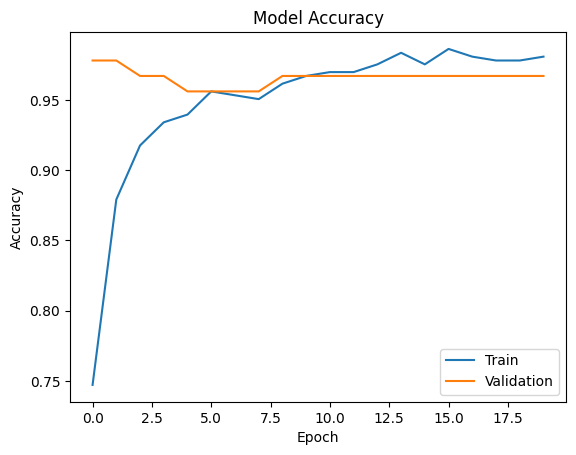

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Logistic Regression accuracy:",accuracy_score(y_test, y_pred))

Logistic Regression accuracy: 0.9736842105263158


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred =( model.predict(x_test)>0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    activation  = 'relu',
    input_shape = (28,28,1)
))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = 'relu'
))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation = 'relu'))

In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train_mnist = x_train_mnist/255.0
x_test_mnist = x_test_mnist/255.0

x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1)

print(x_train_mnist.shape)
print(x_test_mnist.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
history = model.fit(
    x_train_mnist, y_train_mnist,
    epochs = 10,
    batch_size = 64,
    validation_split = 0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8577 - loss: 0.4496 - val_accuracy: 0.9857 - val_loss: 0.0492
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9816 - loss: 0.0615 - val_accuracy: 0.9882 - val_loss: 0.0416
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9851 - loss: 0.0459 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9892 - val_loss: 0.0385
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9912 - val_loss: 0.0312
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9908 - val_loss: 0.0372
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9925 - val_loss: 0.0295
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_mnist, y_test_mnist)
print("Test Loss: ", test_loss, "Test Accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9899 - loss: 0.0333
Test Loss:  0.025684485211968422 Test Accuracy:  0.9927999973297119


In [ ]:
import numpy as np

y_pred = model.predict(x_test_mnist)
y_pred_classes =  np.argmax(y_pred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


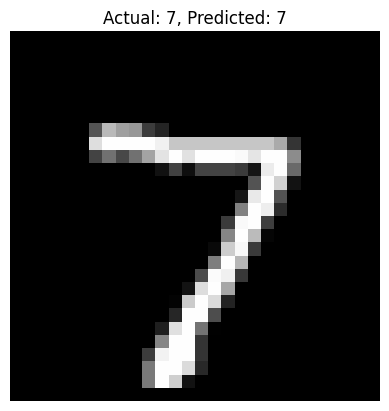

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test_mnist[0].reshape(28,28), cmap = 'gray')
plt.title(f"Actual: {y_test_mnist[0]}, Predicted: {y_pred_classes[0]}")
plt.axis('off')
plt.show()

Wrong predictions


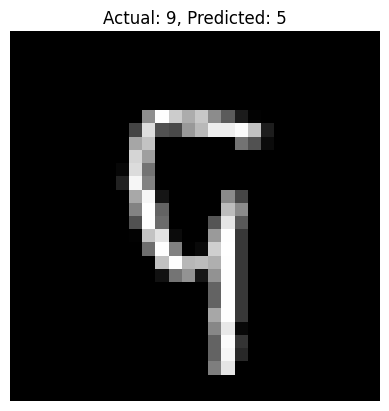

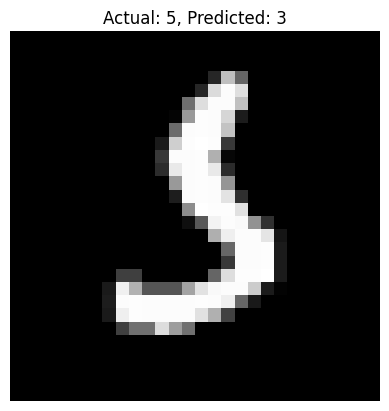

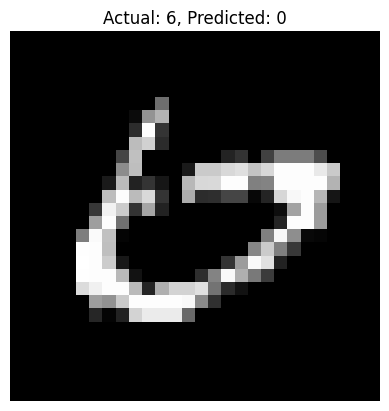

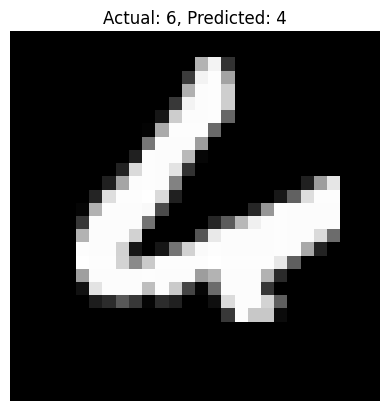

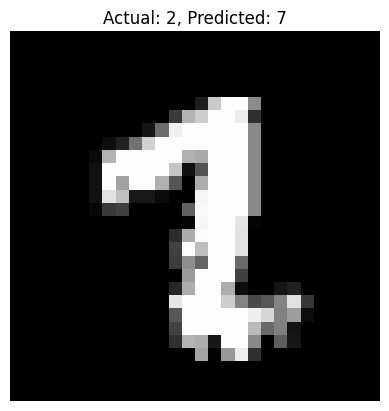

In [ ]:
import numpy as np
wrong_indices = np.where(y_pred_classes != y_test_mnist)[0]
print("Wrong predictions")
for i in wrong_indices[:5]:
    plt.imshow(x_test_mnist[i].reshape(28,28), cmap = 'gray')
    plt.title(f"Actual: {y_test_mnist[i]}, Predicted: {y_pred_classes[i]}")
    plt.axis('off')
    plt.show()


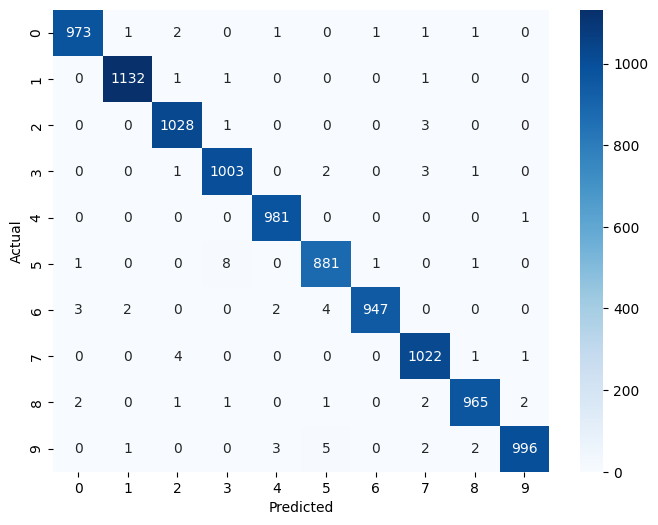

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_mnist, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()